# Importing packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

# Load dataset

In [2]:
train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes = load_dataset()

# example data

y = [1]


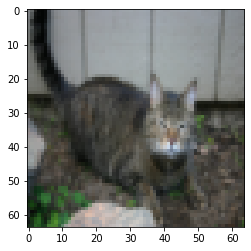

In [71]:
import random
example = random.randint(0,train_set_y_orig.shape[1])
plt.imshow(train_set_x_orig[example])
print("y = " + str(train_set_y_orig[:,example]))

# Reshaping the data

In [25]:
m_train = train_set_y_orig.shape[1]
m_test = test_set_y_orig.shape[1]
num_px = train_set_x_orig[0].shape[0]

64

In [33]:
train_set_x_flat = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flat = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T


# Flattening the Data

In [42]:
train_set_x = train_set_x_flat/255
test_set_x = test_set_x_flat/255

# Defining weights and B
For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$


In [47]:
def sigmoid(z):
    """
    Args:
        z-> Scalar or numpy array of any shape

    returns:
        s-> sigmoid(z)
    """
    s = 1. /(1+np.exp(-z))
    return s
print(sigmoid(np.array([0,1,-1])))

[0.5        0.73105858 0.26894142]


In [48]:
def initialize(dim):
    """
    Args:
        dim -> dimennsions
    Returns:
        w -> vector of shape(dim,1)
        b -> scalar
    """
    w = np.zeros((dim,1))
    b = 0
    return w,b

In [54]:
dim = m_train
w, b = initialize(dim)
w.shape

(209, 1)

# Forward and back propgation

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(0)}, a^{(1)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [63]:
def propagate(w,b,X,Y):
    """
    Args:
     w -> weights numpy array of shape(num_px*num_px*3,1)
     b -> bias, scalar
     X -> data of shape(num_px*num_px*3,number of examples)
     Y -> True or false label data of shape(1,number of examples)

    Return:
     cost -> neagtive log of cost of logistic regression
     dw   -> gradient of loss and w
     db   -> gradient of loss and b 
    """
    m = X.shape[1]
    
    activation = sigmoid(np.dot(w.T, X) + b)
    cost = (-1. /m) * np.sum((Y*np.log(activation)) + (1-Y)*np.log(1-activation), axis=1)
    dw = (1. /m ) * np.dot(X,(activation - Y).T)
    db = (1. /m) * np.sum(activation-Y, axis = 1)
    grads = {"dw":dw,
            "db":db}
    cost = np.squeeze(cost)
    return grads, cost


In [65]:
w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]), np.array([[1,0]])
grads, cost = propagate(w, b, X, Y)
str(cost)

'6.000064773192205'

## Optimization using back propagation
- Compute a cost function and its gradient.
- Update the parameters using gradient descent.

In [92]:
def optimize(w,b,X,Y, num_iterations, learning_rate, print_cost = False):
    """
    args:
      w -> weights numpy array of shape(num_px*num_px*3,1)
      b -> bias, scalar
      X -> data of shape(num_px*num_px*3,number of examples)
      Y -> True or false label data of shape(1,number of examples)
      num_iterations -> number of optimizations loop
      learning_rate -> learning learning rate of gradient update rule
      print_cost -> print the loss every 100 steps
    Returns:
       params -> dictionary containing weights and bias
       grads -> dictionary of gradients 
       costs -> lists of all costs
    """
    costs = []

    for i in range(num_iterations):
        grads,cost = propagate(w,b,X,Y)

        dw = grads["dw"]
        db = grads["db"]

        w = w - learning_rate*dw
        b = b - learning_rate*db

        if i%100 == 0:
            costs.append(cost)
        
        if i%100 == 0 and print_cost == True:
            print ("Cost after iteration %i: %f" %(i, cost))

    params = {
        "w": w,
        "b": b
    }

    grads = {
        "dw": dw,
        "db": db
    }
    return params,  grads, costs


In [93]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.1124579 ]
 [0.23106775]]
b = [1.55930492]
dw = [[0.90158428]
 [1.76250842]]
db = [0.43046207]


# Final function to predictions

In [94]:
def predict(w, b, X):
    """
    Predict whether the label is 0 or 1 using logistic regression params (w,b)

    Args:
      w -> weights numpy array of shape(num_px*num_px*3,1)
      b -> bias, scalar
      X -> data of shape(num_px*num_px*3,number of examples)

    Returns:
     Y_predictions -> np array containing all predictions for images in X
    """
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)

    A = sigmoid(np.dot(w.T, X) + b)

    for i in range(A.shape[1]):
        if A[0,i] >= 0.5:
            Y_prediction[0,i] = 1
        
        else:
            Y_prediction[0,i] = 0
    return Y_prediction
    

In [95]:
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1.]]


# Final Model

In [98]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    w,b = initialize(X_train.shape[0])
    parameters, grads, costs = optimize(w,b,X_train, Y_train, num_iterations, learning_rate, print_cost)

    w = parameters["w"]
    b = parameters["b"]

    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    print("train Accuracy: {} %".format(100-np.mean(np.abs(Y_prediction_train - Y_train))*100))
    print("test Accuracy: {} %".format(100-np.mean(np.abs(Y_prediction_test - Y_test))*100))

    d = {
        "costs": costs,
        "Y_predictions_test": Y_prediction_test,
        "Y_predictions_train": Y_prediction_train,
        "w": w,
        "b": b,
        "learning_rate": learning_rate,
        "num_iterations": num_iterations
    }
    return d

In [99]:
d = model(train_set_x, train_set_y_orig, test_set_x, test_set_y_orig, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train Accuracy: 99.04306220095694 %
test Accuracy: 70.0 %


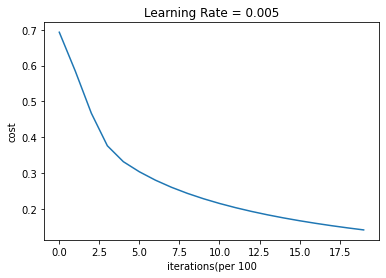

In [106]:
costs = np.squeeze(d["costs"])
plt.plot(costs)
plt.ylabel("cost")
plt.xlabel("iterations(per 100")
plt.title("Learning Rate = " + str(d["learning_rate"]))
plt.show()

# Effects of learning Rate

In [107]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}

for i in learning_rates:
    print("learning rate is : " + str(i))
    models[str(i)] = model(train_set_x, train_set_y_orig, test_set_x, test_set_y_orig, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

learning rate is : 0.01
train Accuracy: 99.52153110047847 %
test Accuracy: 68.0 %

-------------------------------------------------------

learning rate is : 0.001
train Accuracy: 88.99521531100478 %
test Accuracy: 64.0 %

-------------------------------------------------------

learning rate is : 0.0001
train Accuracy: 68.42105263157895 %
test Accuracy: 36.0 %

-------------------------------------------------------



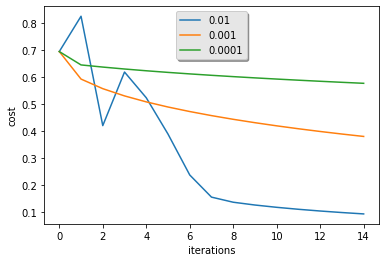

In [108]:
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label = str(i))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()